In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman
import numpy as np

In [2]:
# Load the dataset
df = pd.read_csv("sma_ques10_dataset.csv")
G = nx.Graph()
G.add_edges_from(zip(df["source"], df["target"]))

In [3]:
# --- Girvan-Newman Community Detection ---
communities = girvan_newman(G)
top_level_communities = next(communities)
community_list = [list(c) for c in top_level_communities]
print("Detected Communities:", community_list)

Detected Communities: [['S', 'P', 'O', 'R', 'N', 'A', 'C', 'Q', 'M', 'B', 'T'], ['J', 'L', 'E', 'D', 'G', 'H', 'F', 'K', 'I']]


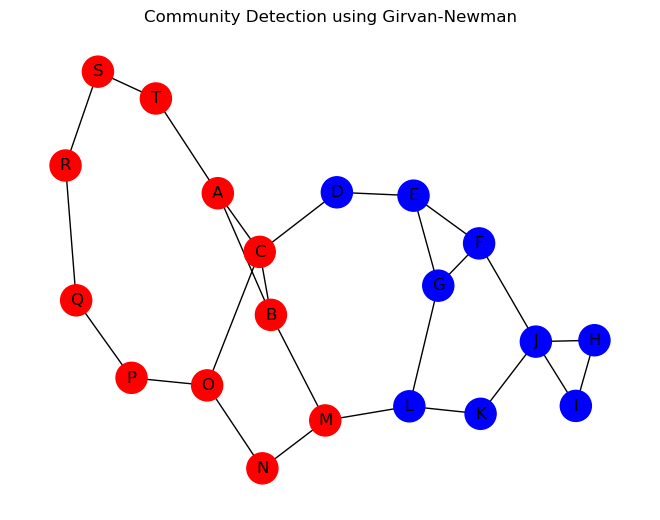

In [4]:
# Draw the graph with communities
color_map = {}
colors = ["red", "blue", "green", "purple", "orange"]
for i, community in enumerate(community_list):
    for node in community:
        color_map[node] = colors[i % len(colors)]

node_colors = [color_map.get(node, "gray") for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=node_colors, node_size=500)
plt.title("Community Detection using Girvan-Newman")
plt.show()

In [5]:
# Compute centralities
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Create a feature matrix
features = []
nodes = list(G.nodes())
for node in nodes:
    features.append([
        degree_centrality[node],
        betweenness_centrality[node]
    ])



In [6]:
# Sort nodes by betweenness centrality
sorted_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
print("\nTop Influential Nodes (by Betweenness Centrality):")
for node, score in sorted_nodes[:5]:
    print(f"{node}: {score:.4f}")


Top Influential Nodes (by Betweenness Centrality):
C: 0.2856
M: 0.2710
L: 0.2515
O: 0.2261
D: 0.2105
